##**Control a Water Tank Level**
Consider a cylindrical tank with no outlet flow and an adjustable inlet flow that is controlled by a valve. The inlet flow rate is not measured but there is a level measurement that shows how much fluid has been added to the tank. The objective of this exercise is to develop a controller that can maintain a certain water level by automatically adjusting the inlet flow rate.
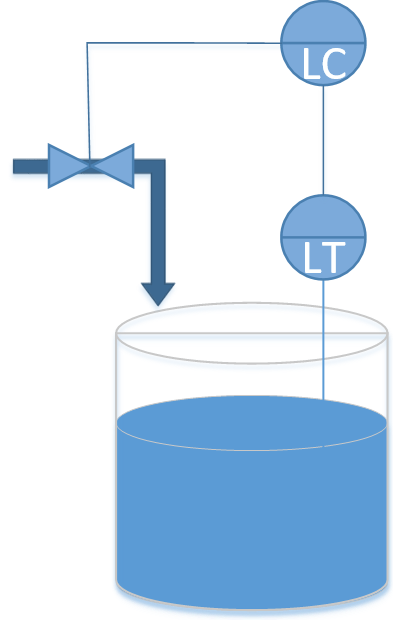

**Note:** The symbol **LT** is an abbreviation for Level Transmitter. A concentration sensor is typically shown as **CT** for Concentration Transmitter or AT for Analyzer Transmitter. A temperature sensor such as a thermocouple is shown as **TT** which stands for Temperature Transmitter. If the second letter is **C** then it is a controller such as **LC** for Level Controller.

This example continues from the introduction to modeling where the process equation is derived and sample Python code is available.

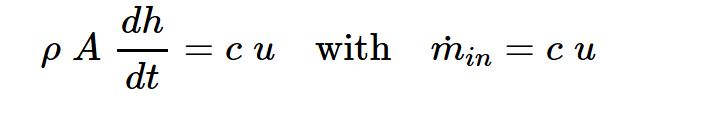

where **c** is a constant that relates valve opening to inlet flow.

Design a P-only controller for the tank to maintain a level set point of 10.0 m. Test the P-only controller with different values of Kc by integrating the mass balance equation for a period of 10 seconds. Use a value of **1000** kg/m3 for density and 1.0 m2 for the cross-sectional area of the tank. For the valve, assume a valve coefficient of **c=50.0** (kg/s / percent open). Make sure that the valve does not exceed the limits of **0-100** percent by clipping the requested valve opening to an acceptable range. For example, if the P-only controller calculates a valve opening of 150 percent, use 100 percent instead.

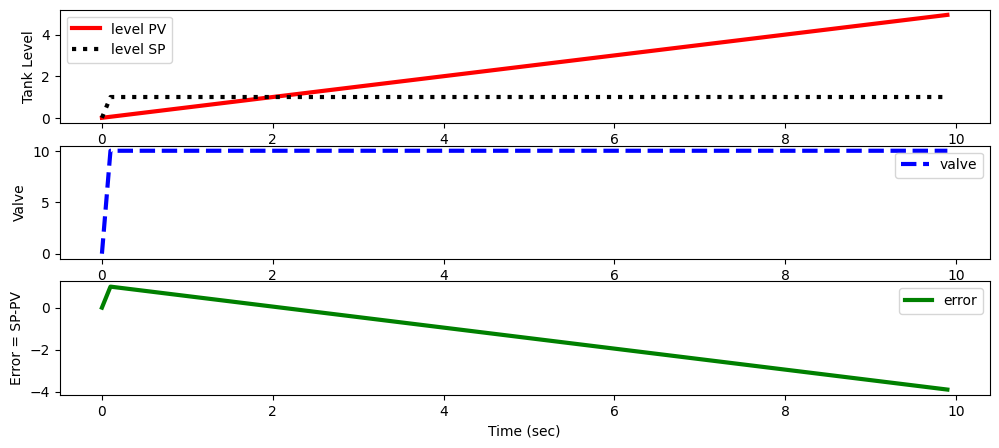

In [1]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# animate plots?
animate=True # True / False

# define tank model
def tank(Level,time,c,valve):
    rho = 1000.0 # water density (kg/m^3)
    A = 1.0      # tank area (m^2)
    # calculate derivative of the Level
    dLevel_dt = (c/(rho*A)) * valve
    return dLevel_dt

# time span for the simulation for 10 sec, every 0.1 sec
ts = np.linspace(0,10,101)

# valve operation
c = 50.0          # valve coefficient (kg/s / %open)
u = np.zeros(101) # u = valve % open

# level initial condition
Level0 = 0

# initial valve position
valve = 10

# for storing the results
z = np.zeros(101)
es = np.zeros(101)
sps = np.zeros(101)

# TO DO: what is the value for ubias?
# ubias = ?

# TO DO: decide on a tuning value for Kc
# Kc = ?

# TO DO: record the desired level (set point)
SP = 1

plt.figure(1,figsize=(12,5))
if animate:
    plt.ion()
    plt.show()

# simulate with ODEINT
for i in range(100):
    # calculate the error
    error = SP - Level0

    # TO DO: put P-only controller here
    # valve = 1

    u[i+1] = valve   # store the valve position
    es[i+1] = error  # store the error
    y = odeint(tank,Level0,[0,0.1],args=(c,valve))
    Level0 = y[-1] # take the last point
    z[i+1] = Level0 # store the level for plotting
    sps[i+1] = SP

    if animate:
        # update plot
        display.clear_output(wait=True)
        plt.figure(1,figsize=(12,5))
        plt.subplot(3,1,1)
        plt.plot(ts[0:i+1],z[0:i+1],'r-',linewidth=3,label='level PV')
        plt.plot(ts[0:i+1],sps[0:i+1],'k:',linewidth=3,label='level SP')
        plt.ylabel('Tank Level')
        plt.legend(loc='best')
        plt.subplot(3,1,2)
        plt.plot(ts[0:i+1],u[0:i+1],'b--',linewidth=3,label='valve')
        plt.ylabel('Valve')
        plt.legend(loc='best')
        plt.subplot(3,1,3)
        plt.plot(ts[0:i+1],es[0:i+1],'g-',linewidth=3,label='error')
        plt.ylabel('Error = SP-PV')
        plt.xlabel('Time (sec)')
        plt.legend(loc='best')
        plt.pause(0.1)

if not animate:
    # plot results
    plt.subplot(3,1,1)
    plt.plot(ts,z,'r-',linewidth=3,label='level PV')
    plt.plot(ts,sps,'k:',linewidth=3,label='level SP')
    plt.ylabel('Tank Level')
    plt.legend(loc='best')
    plt.subplot(3,1,2)
    plt.plot(ts,u,'b--',linewidth=3,label='valve')
    plt.ylabel('Valve')
    plt.legend(loc='best')
    plt.subplot(3,1,3)
    plt.plot(ts,es,'g-',linewidth=3,label='error')
    plt.ylabel('Error = SP-PV')
    plt.xlabel('Time (sec)')
    plt.legend(loc='best')
    plt.show()

<Figure size 1200x500 with 0 Axes>

/tmp/ipython-input-3687723779.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i+1] = Level0 # store the level for plotting


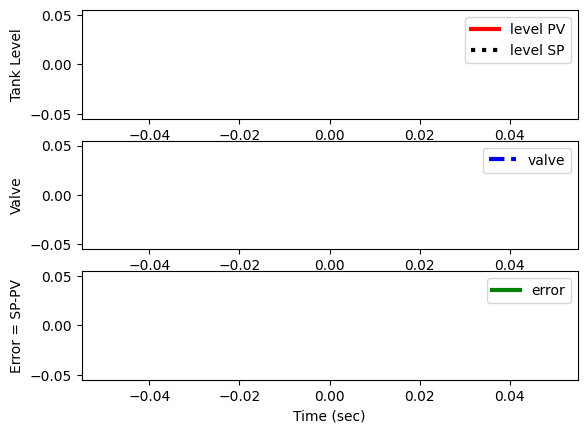

/tmp/ipython-input-3687723779.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  es[i+1] = error  # store the error


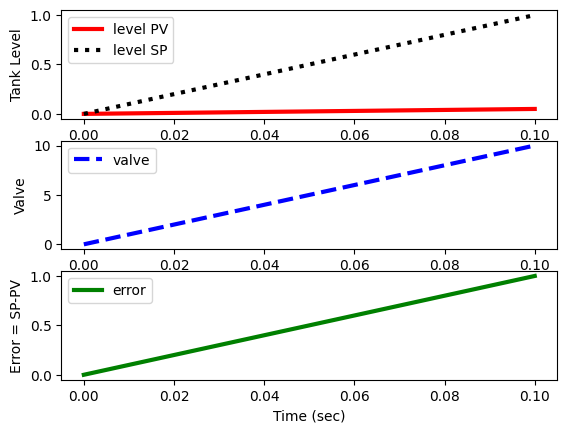

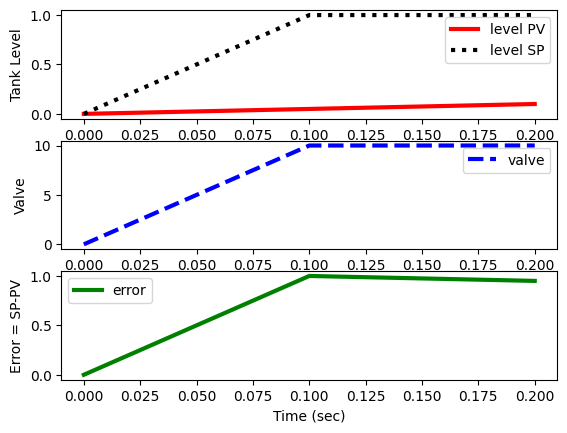

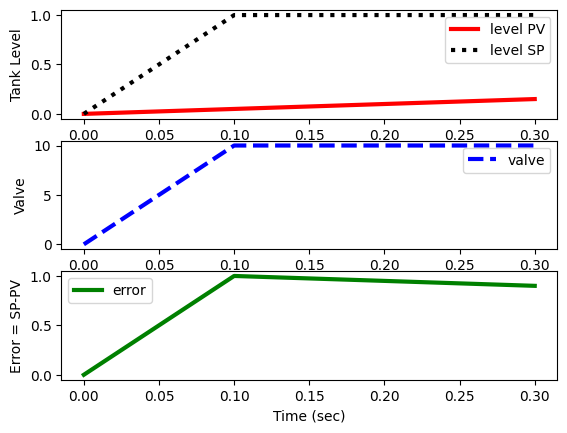

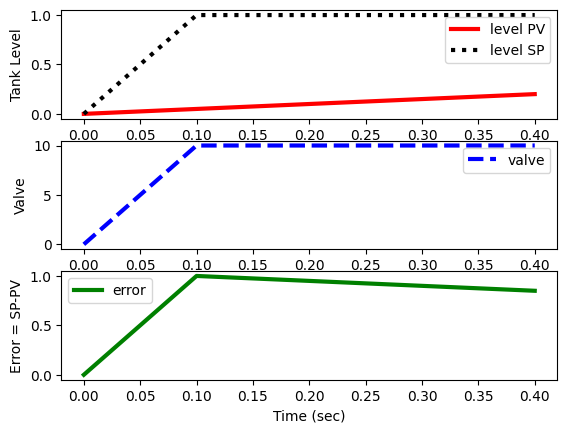

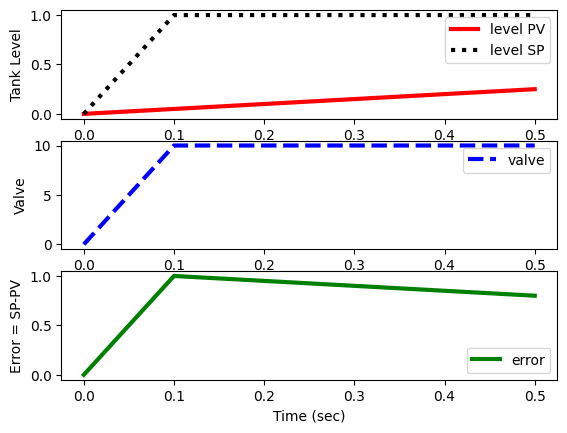

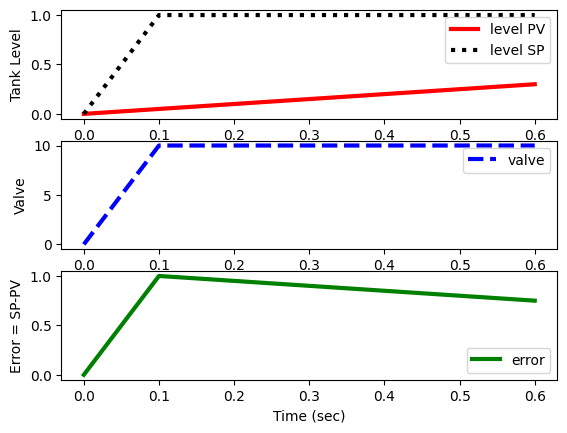

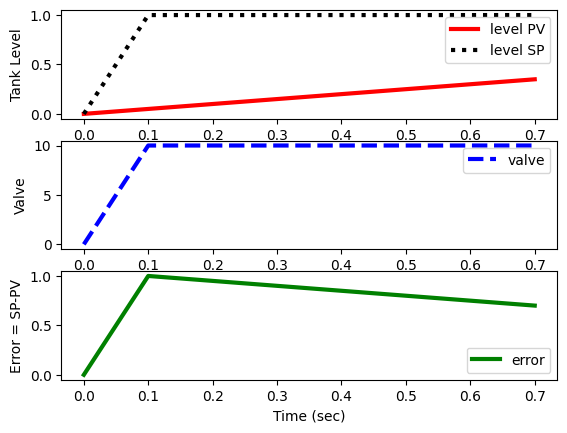

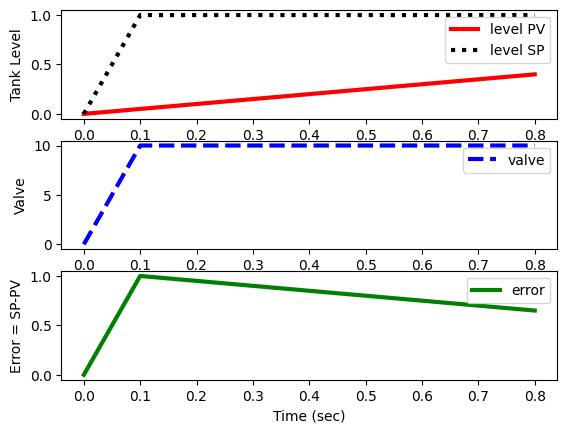

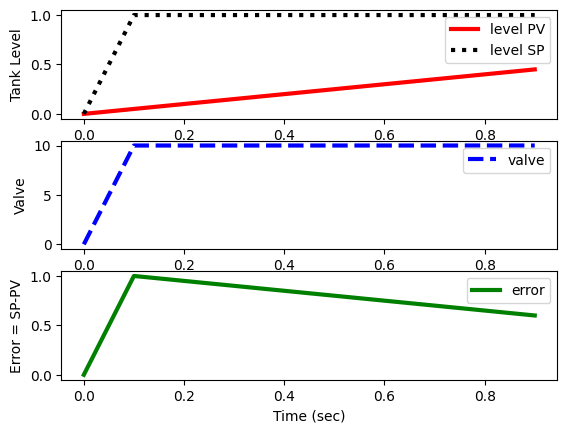

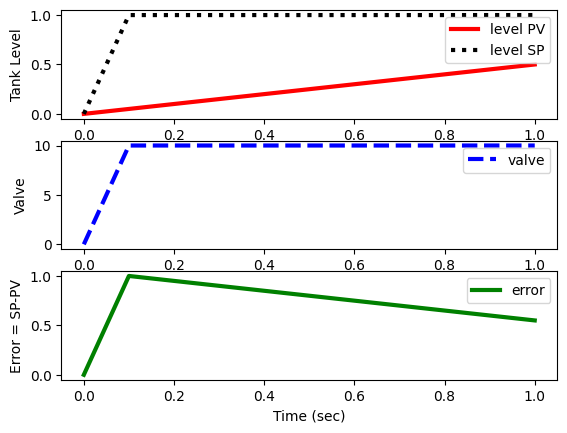

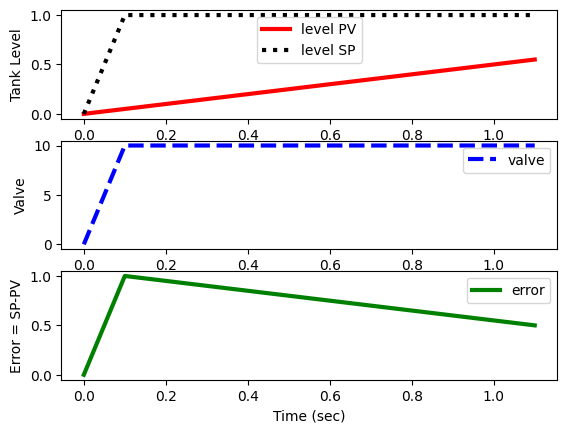

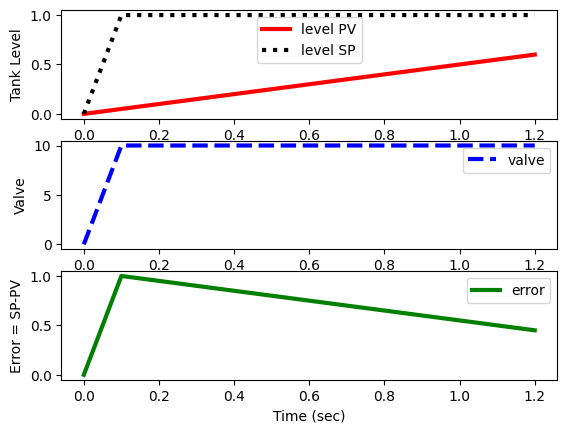

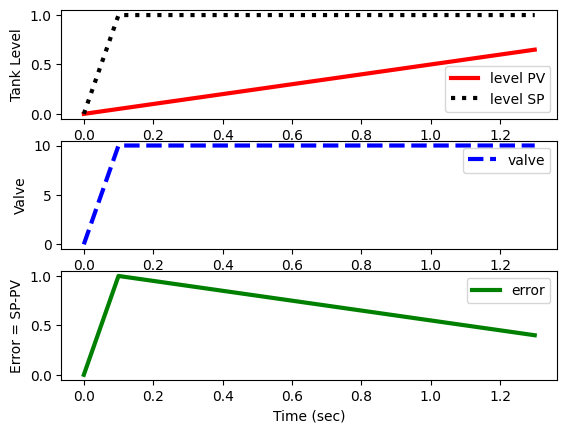

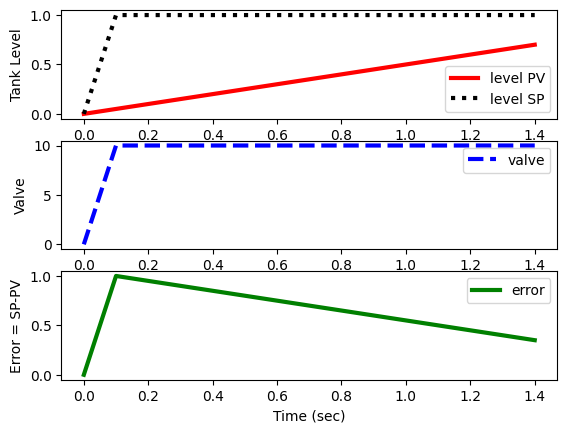

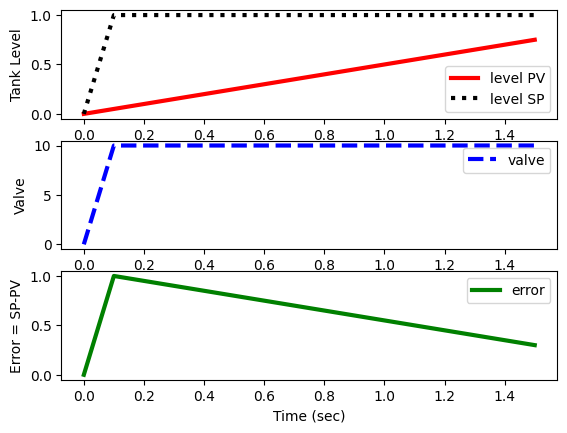

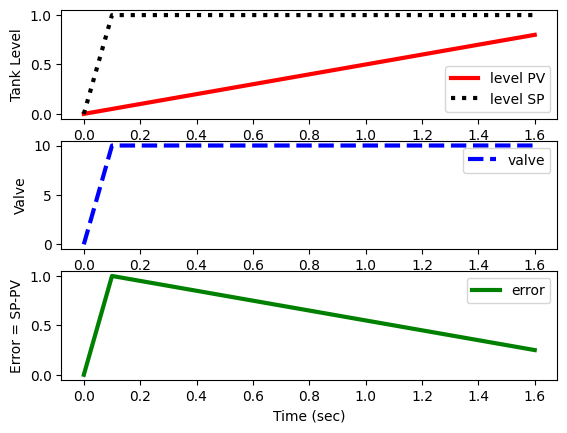

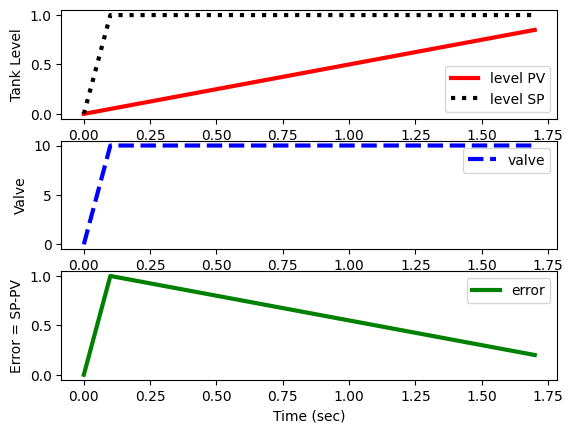

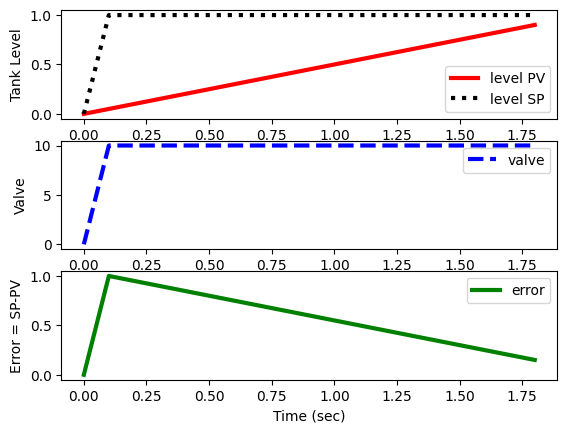

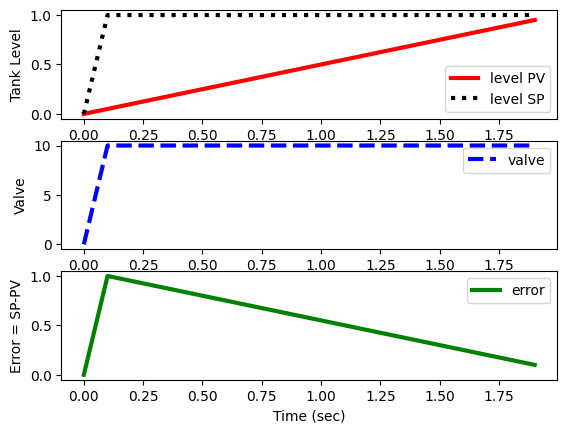

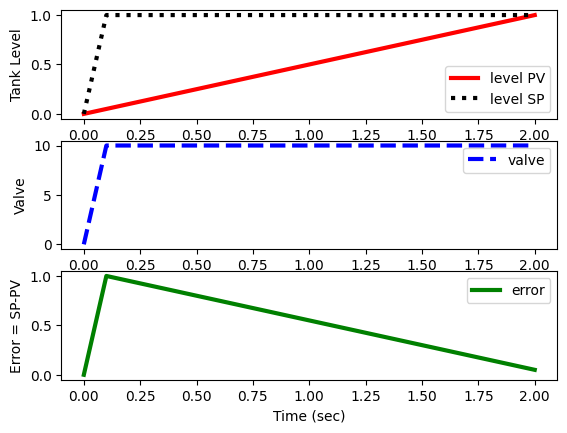

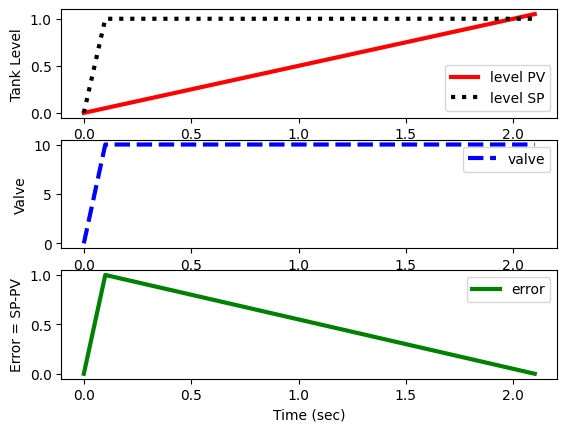

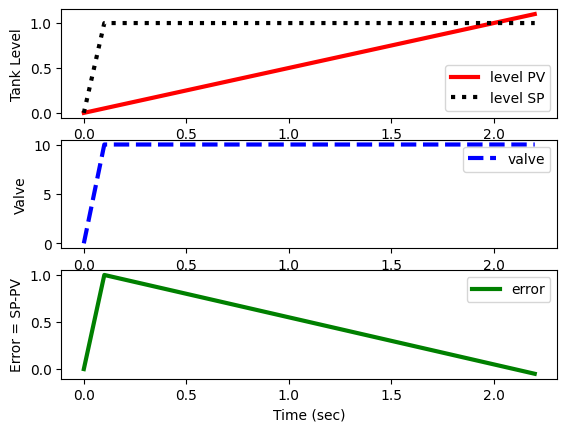

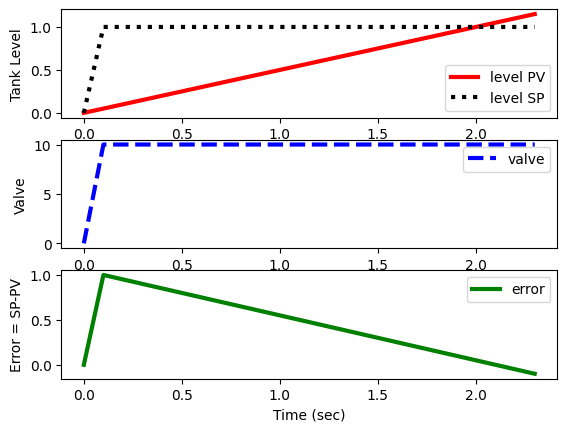

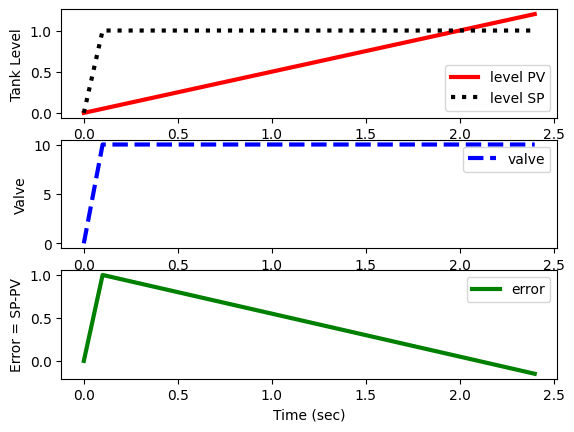

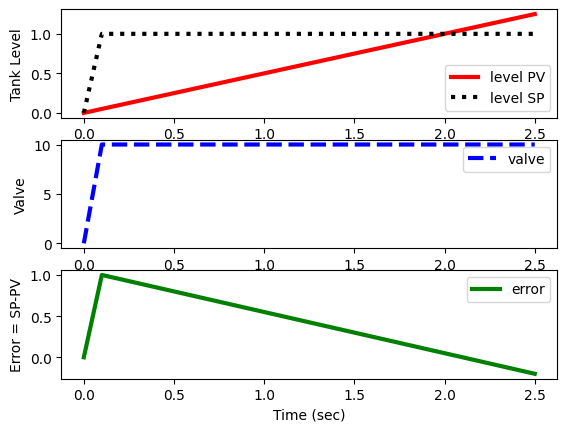

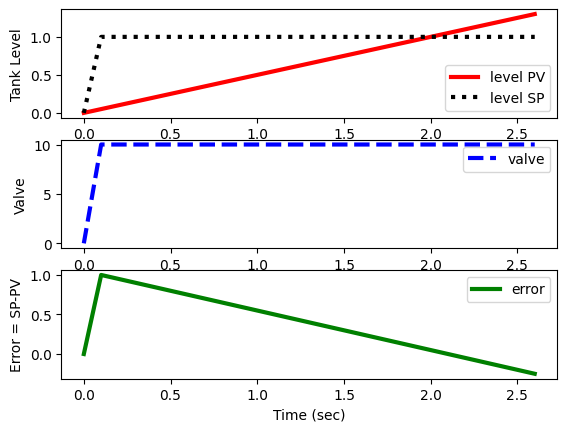

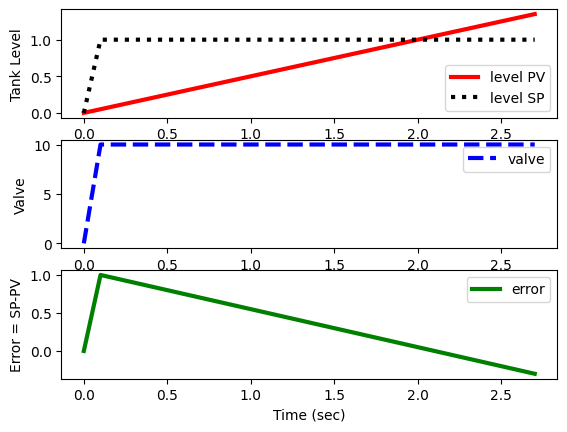

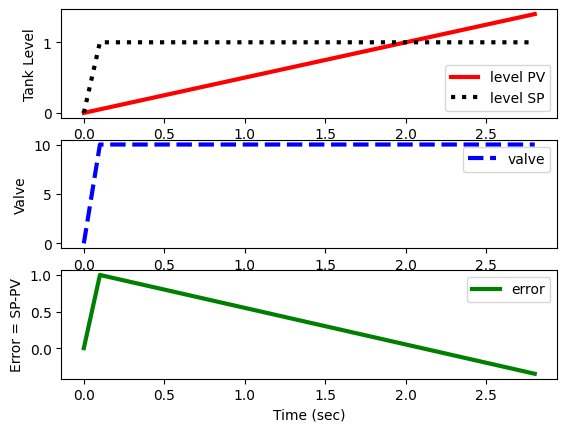

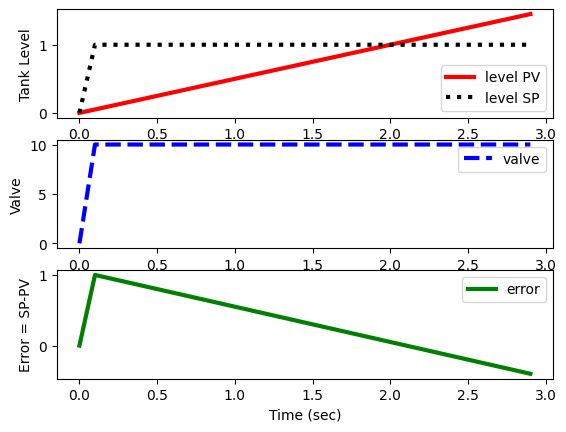

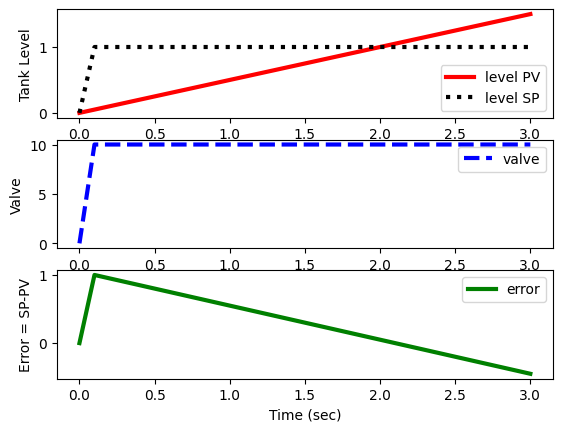

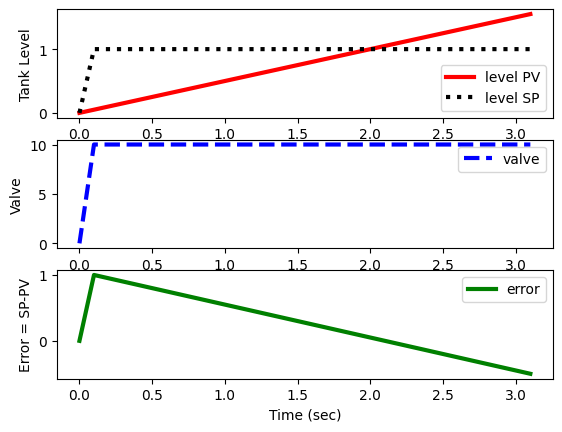

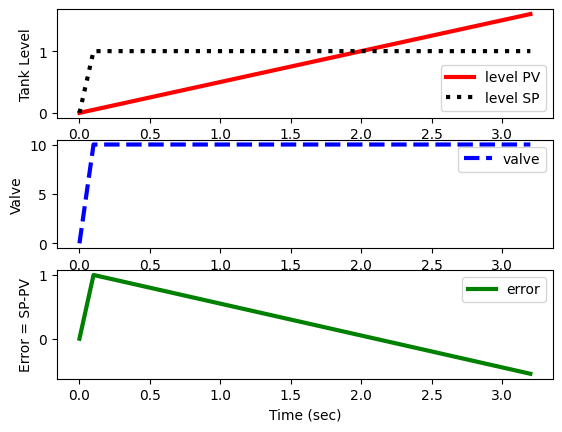

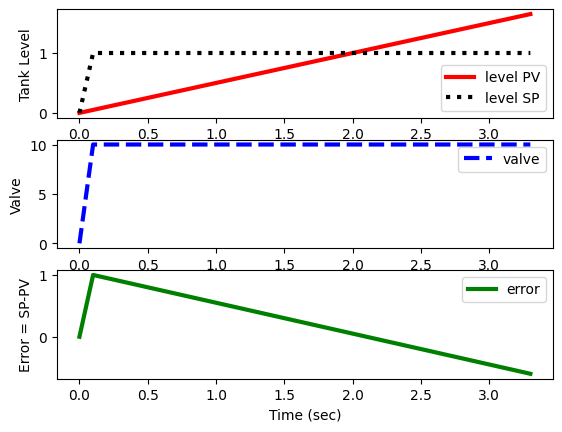

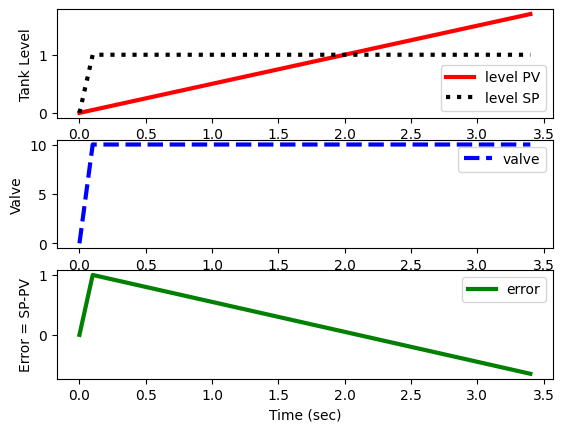

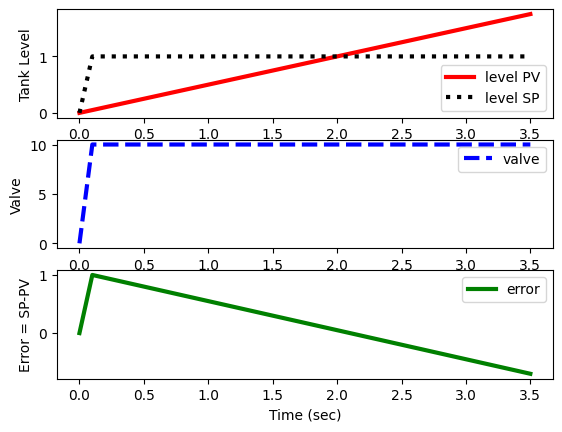

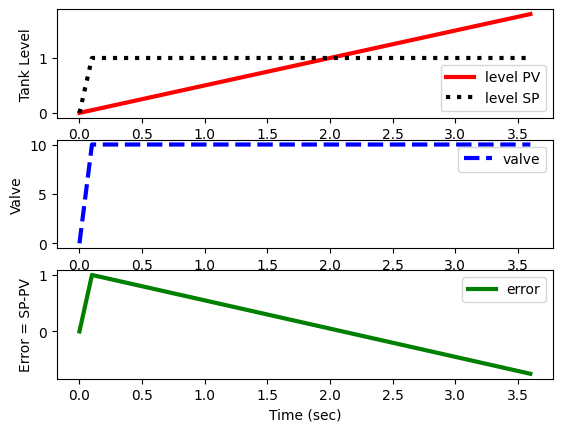

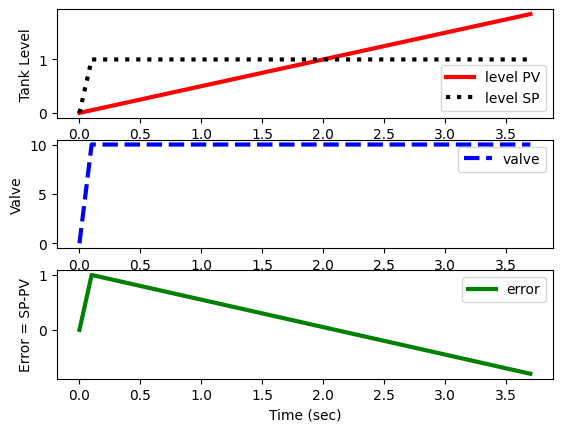

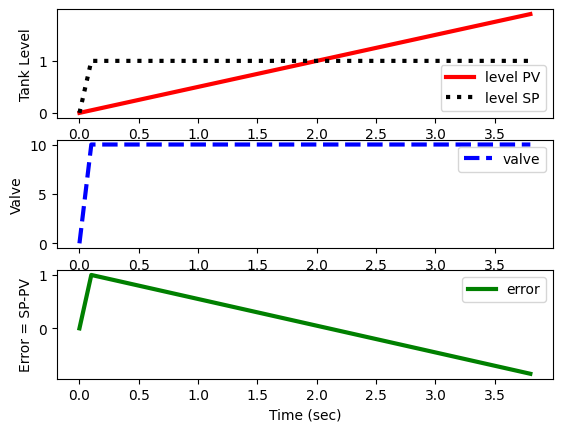

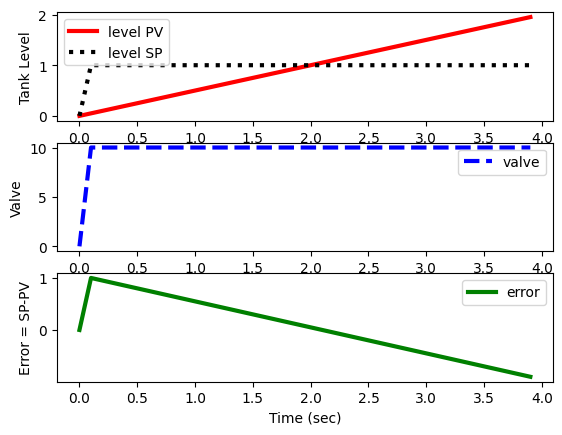

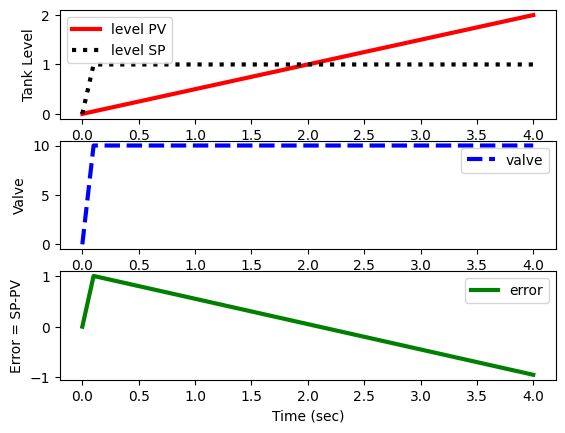

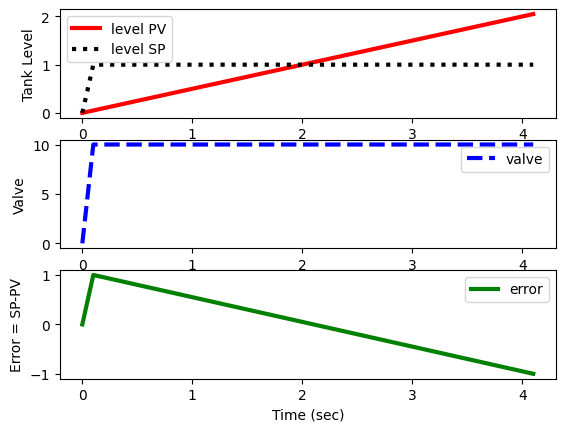

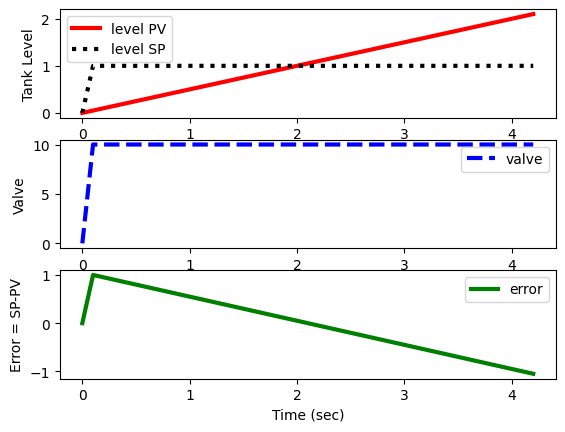

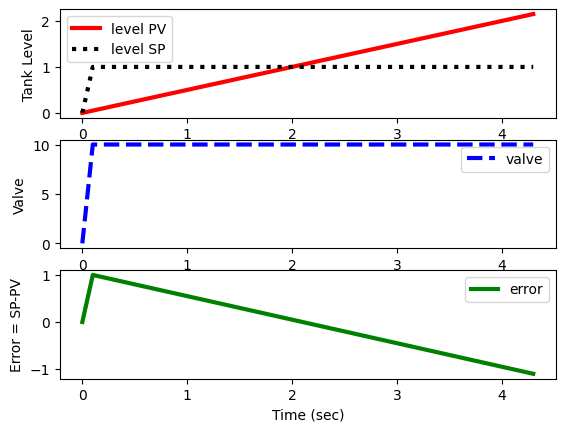

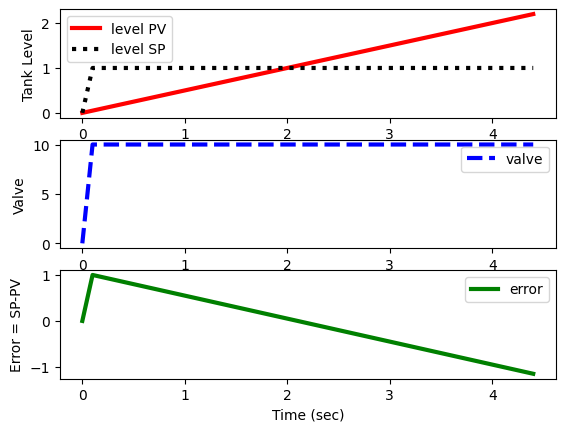

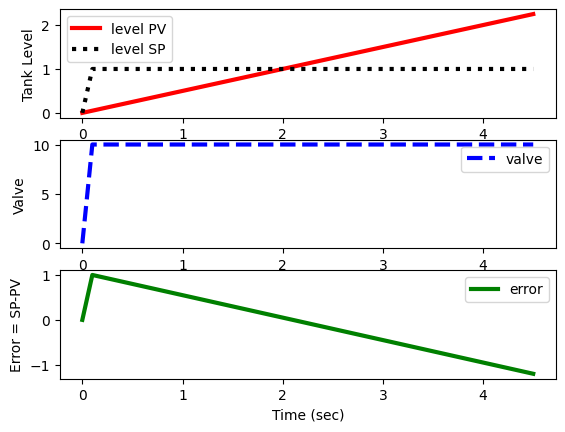

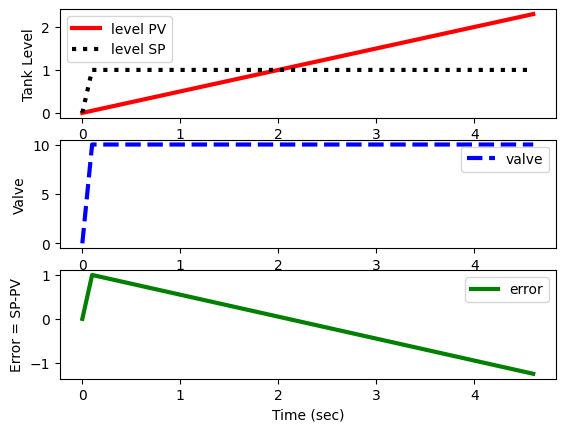

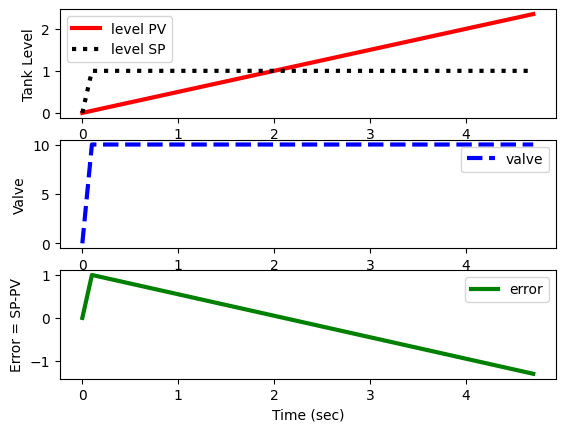

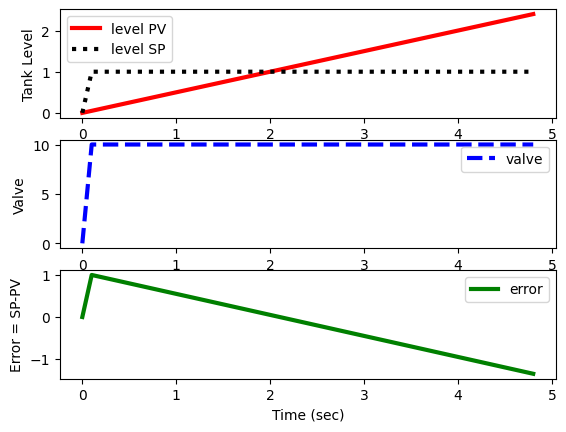

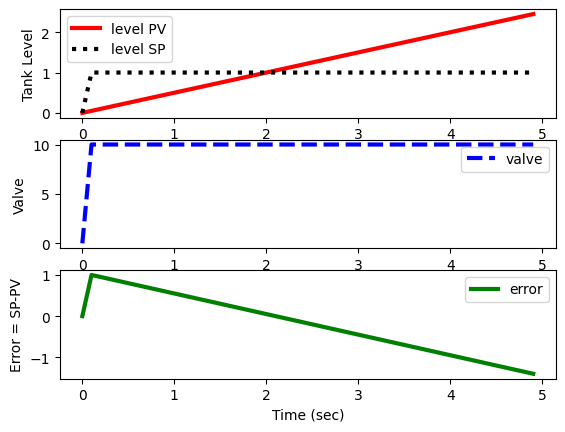

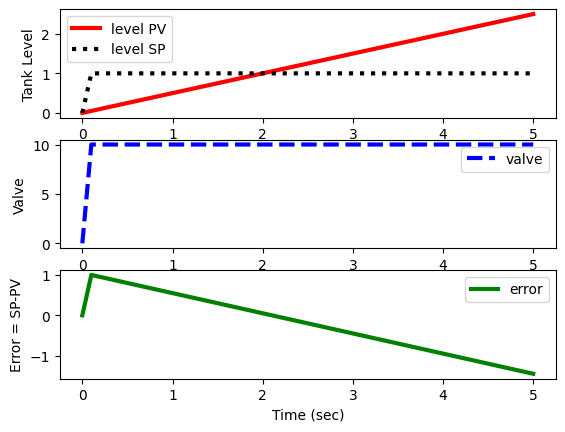

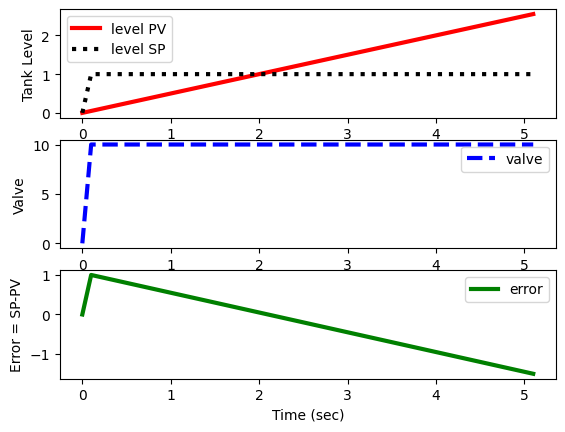

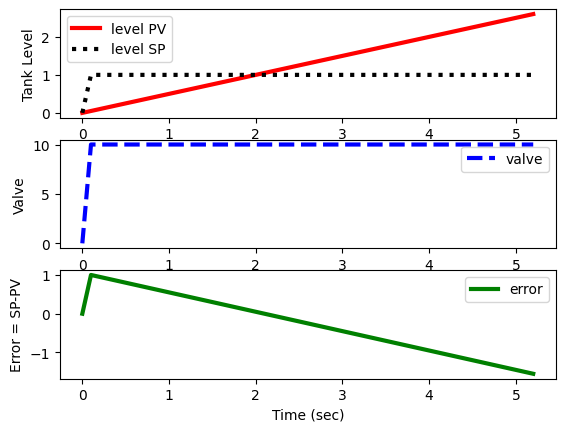

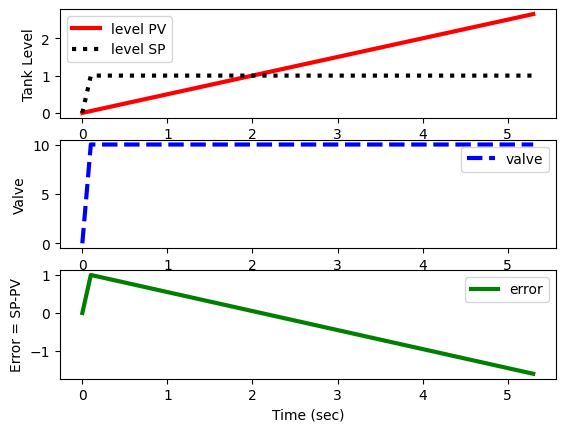

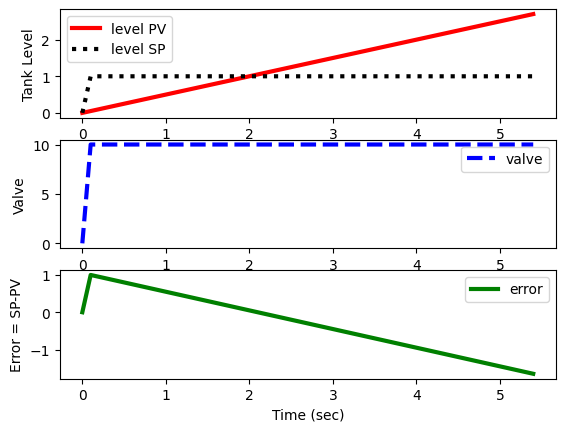

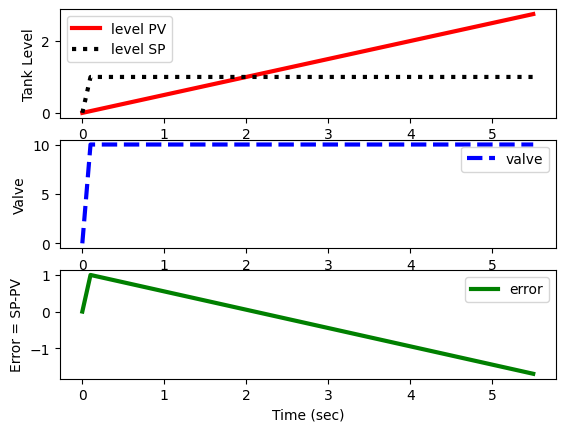

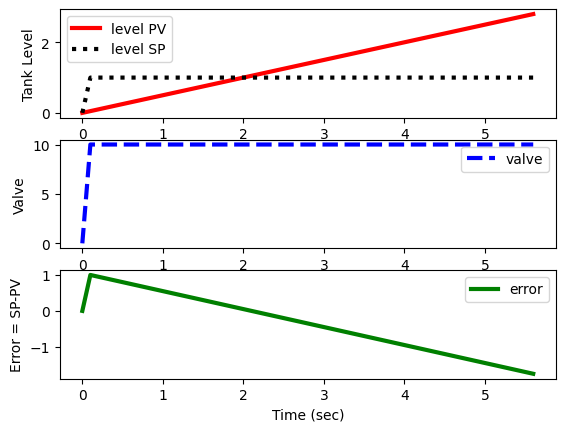

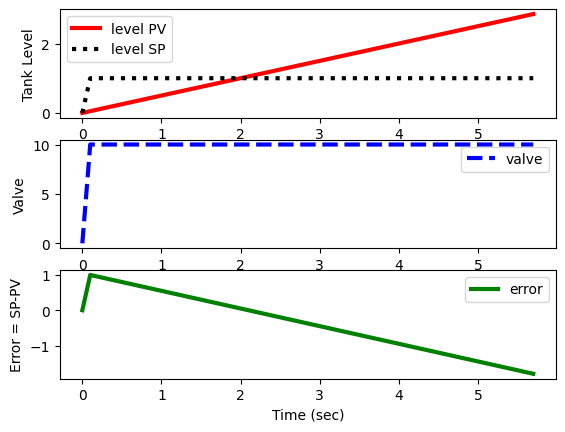

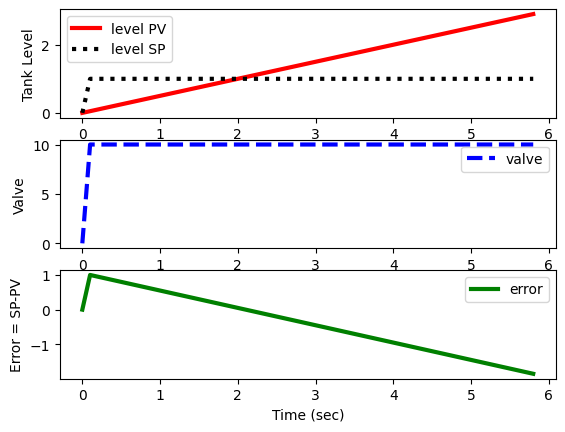

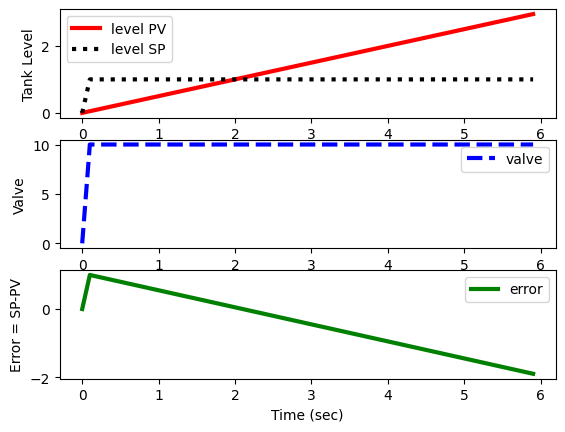

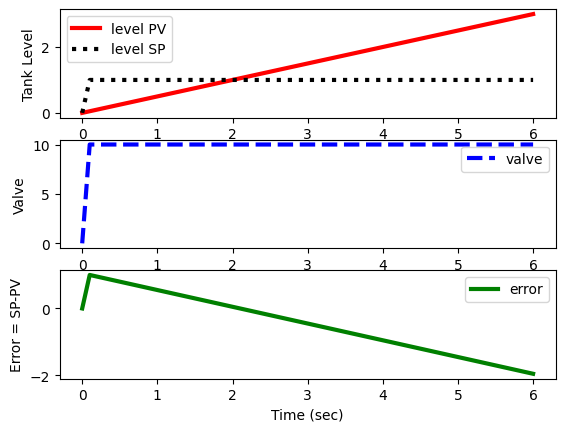

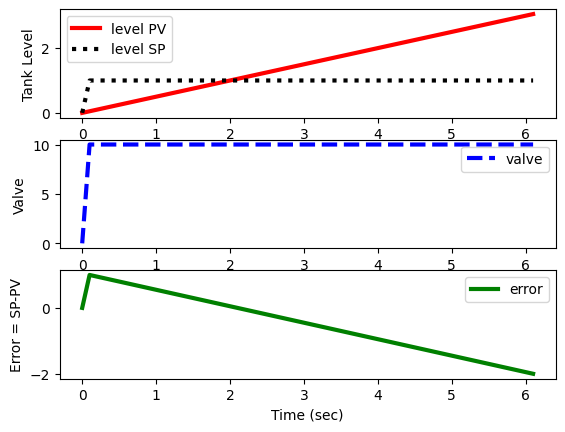

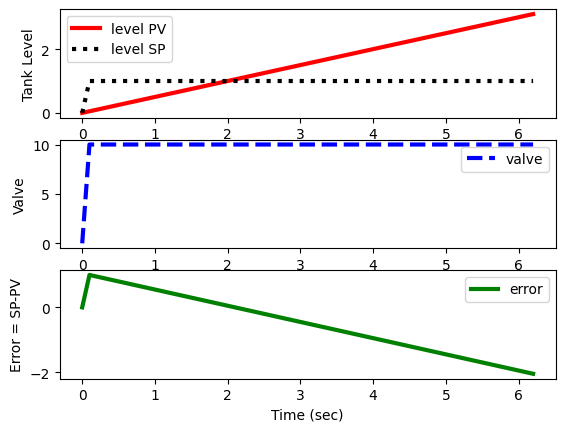

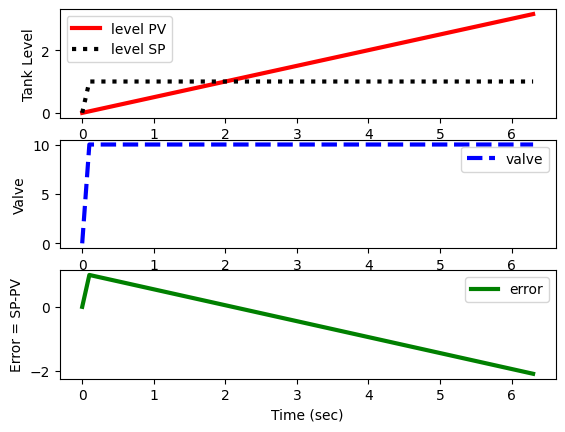

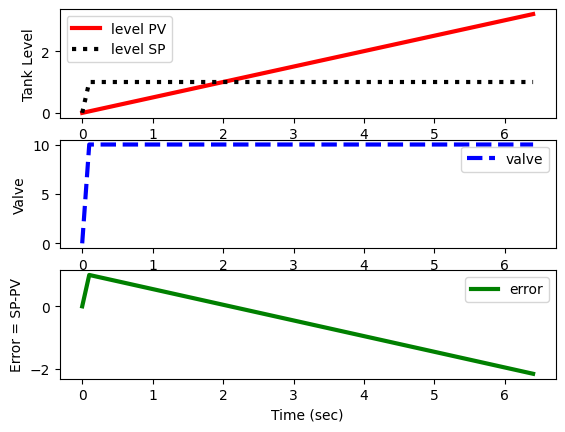

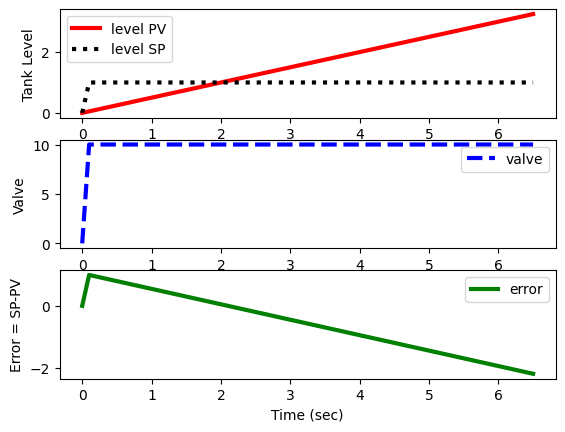

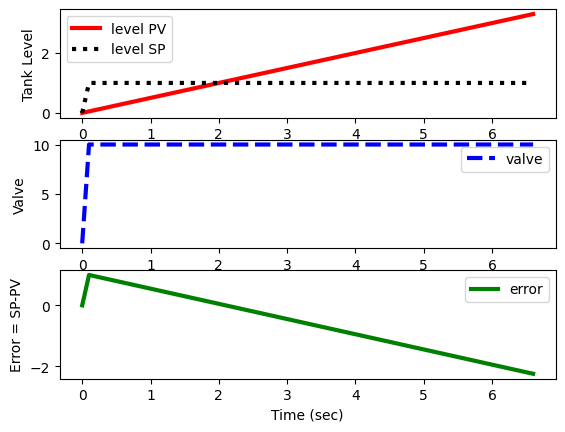

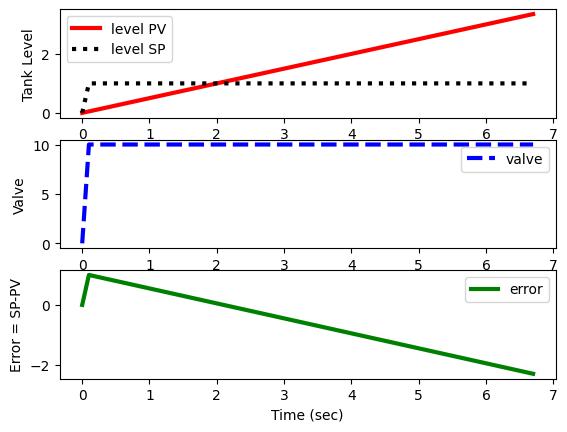

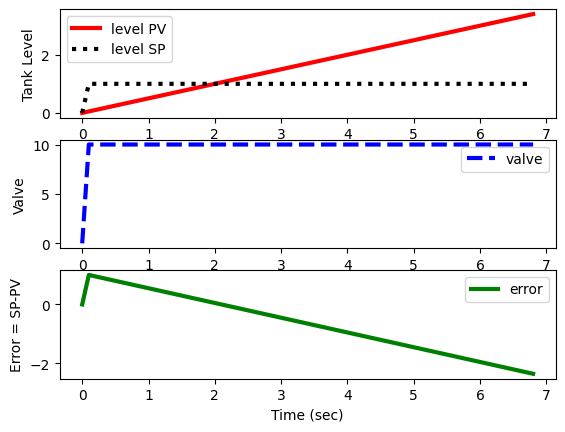

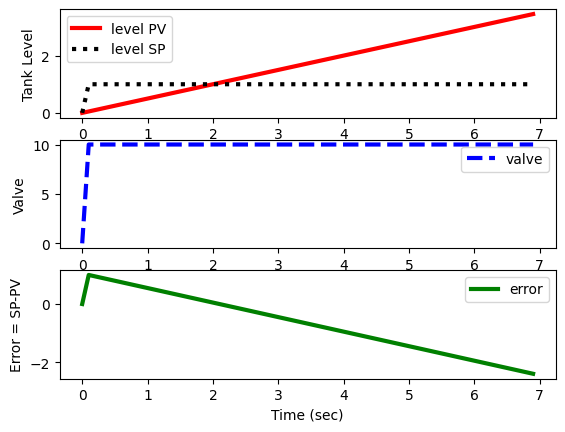

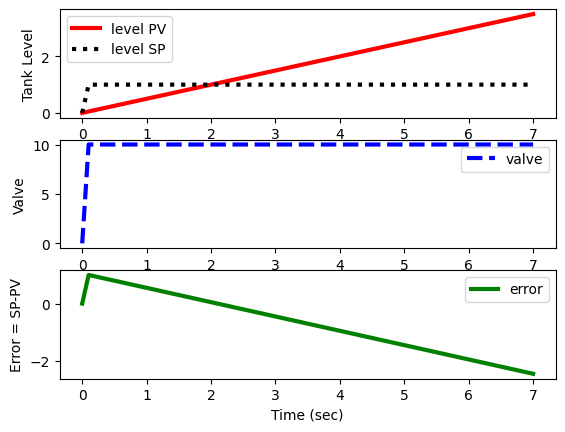

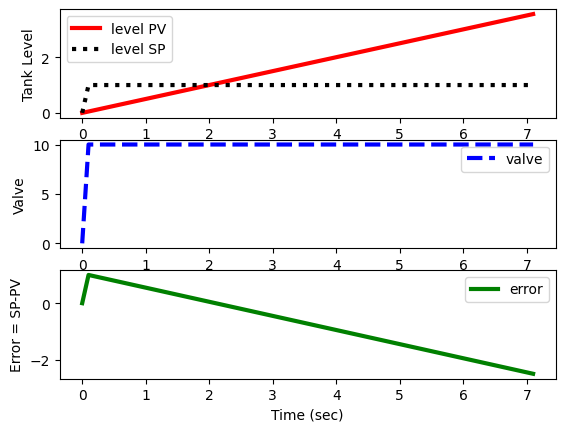

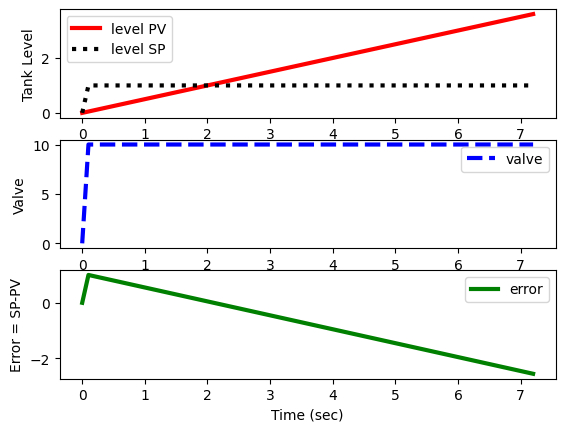

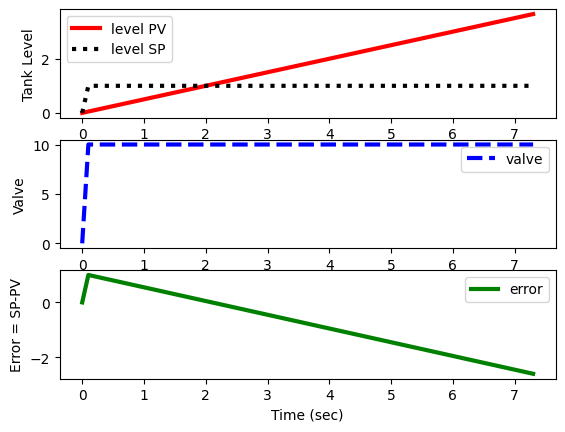

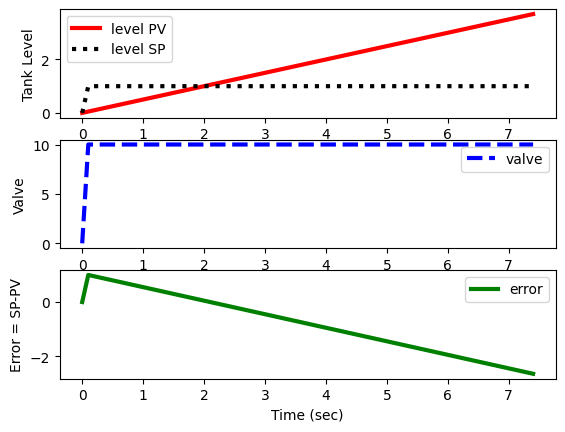

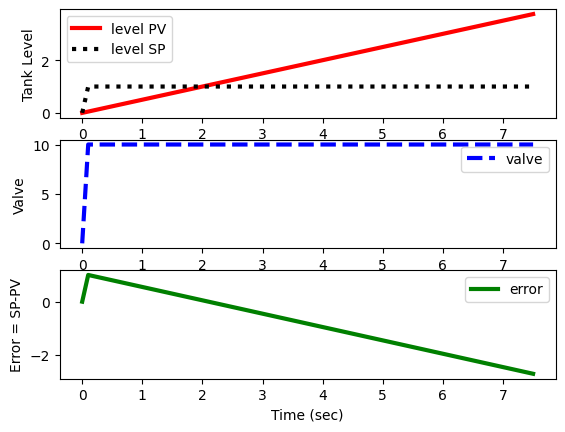

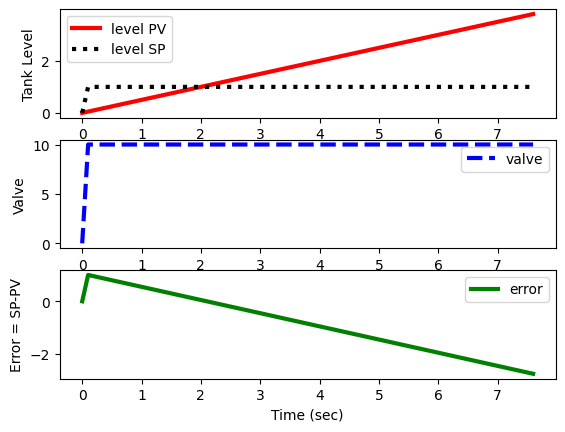

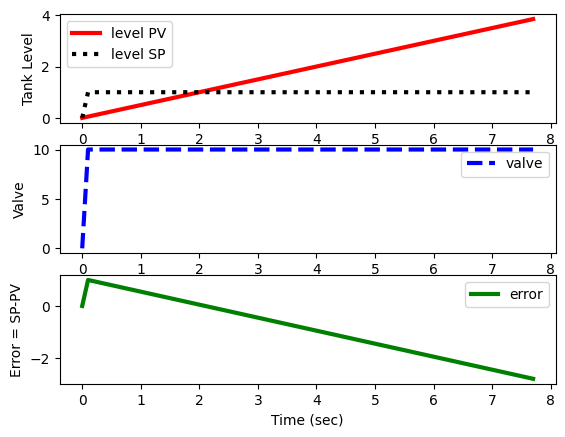

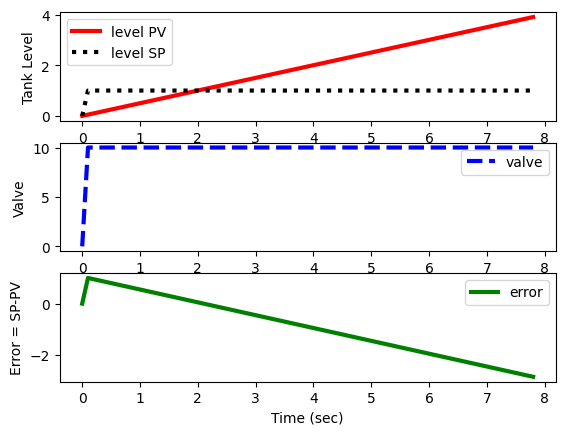

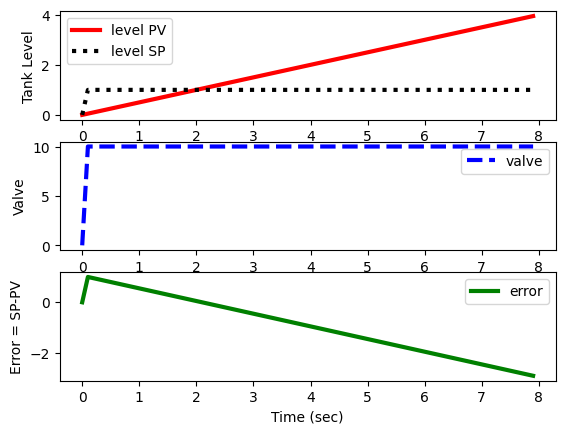

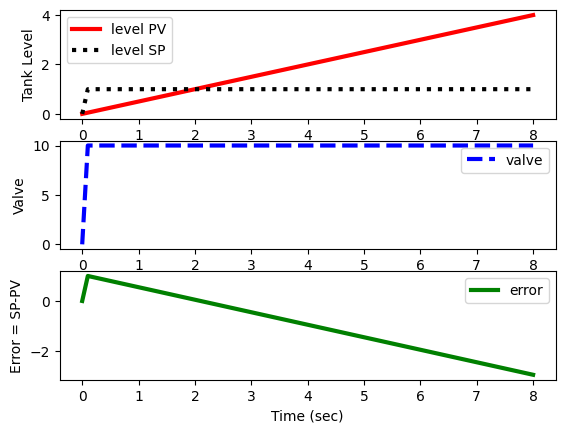

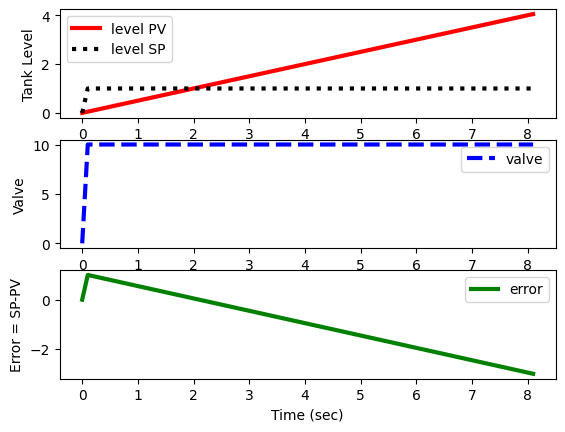

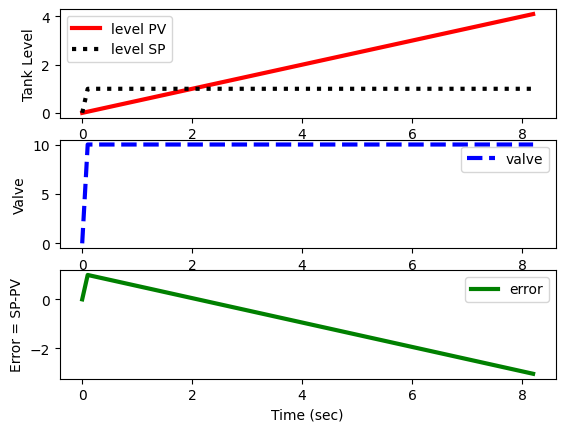

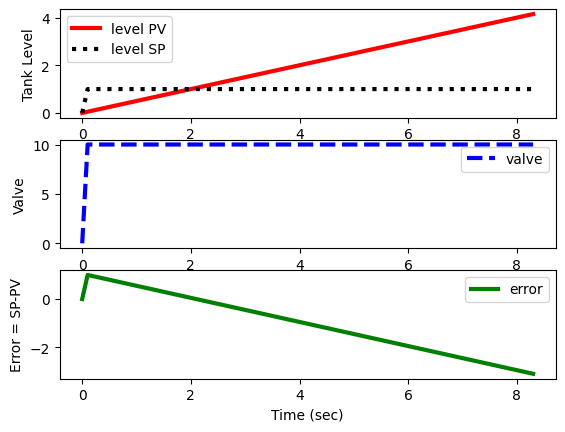

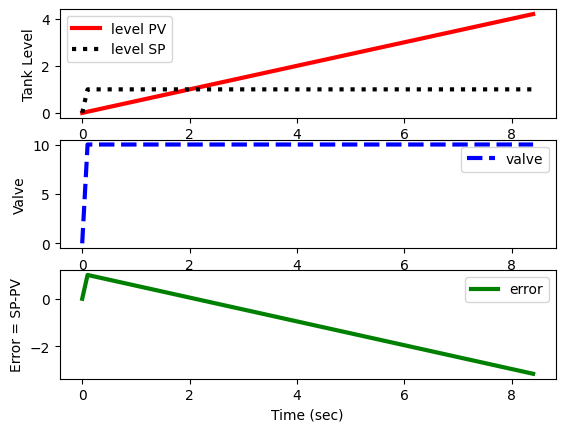

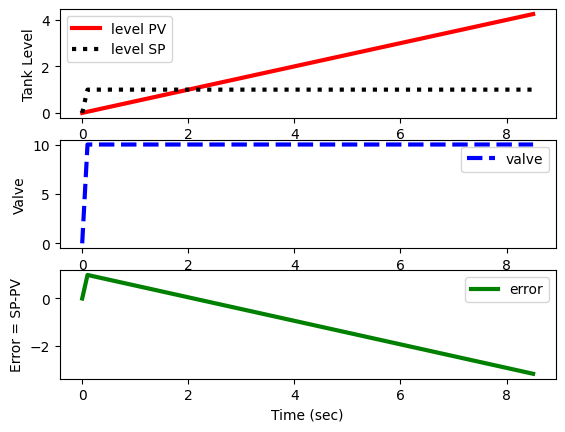

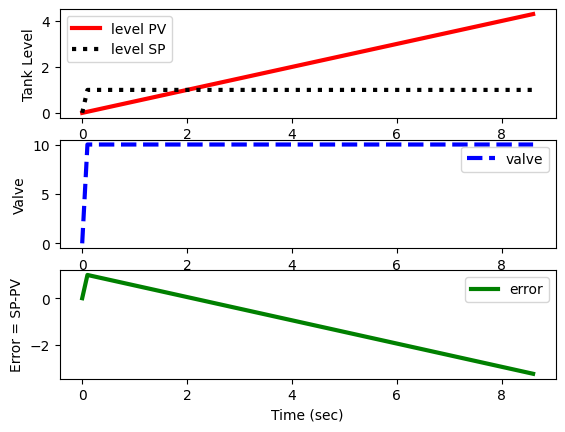

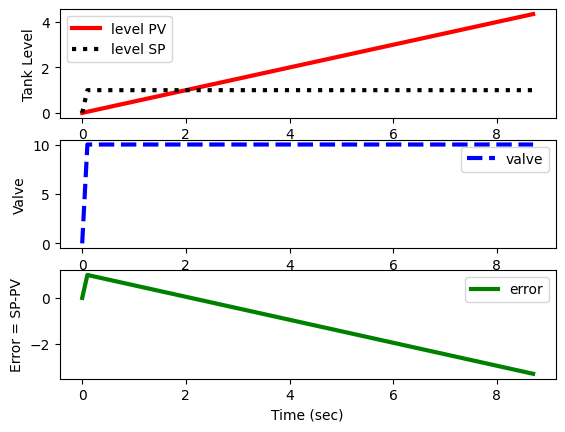

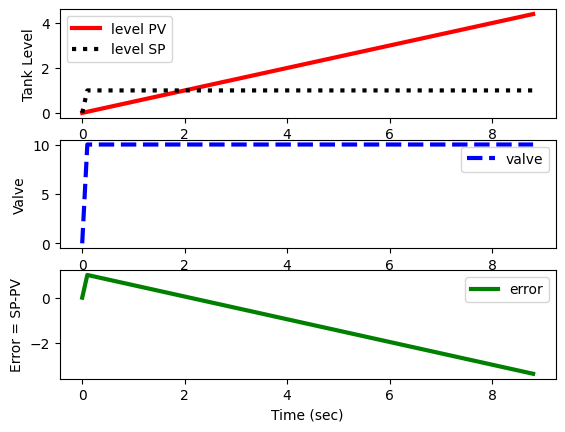

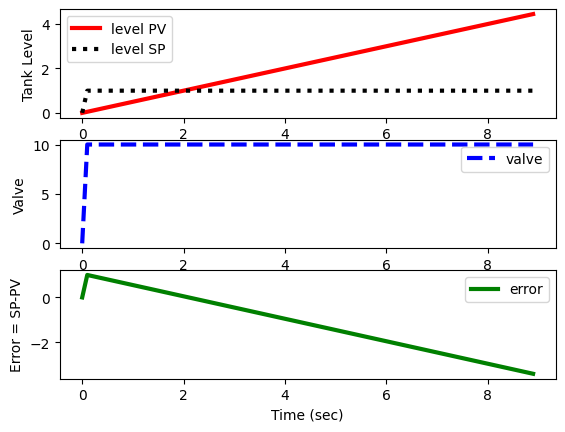

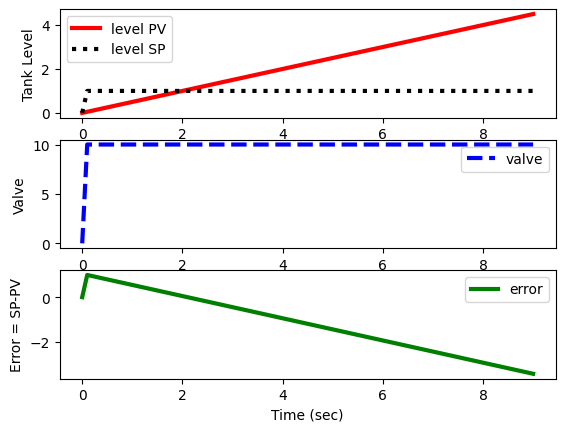

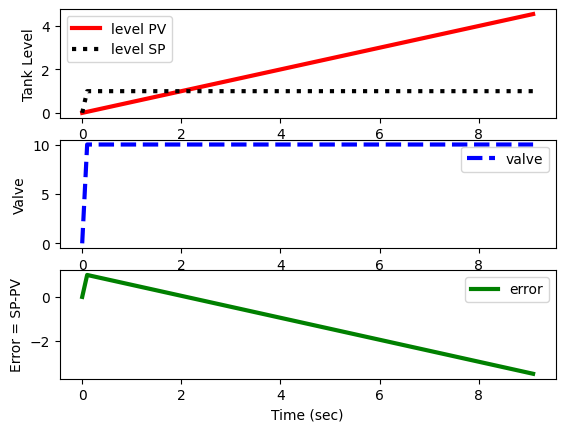

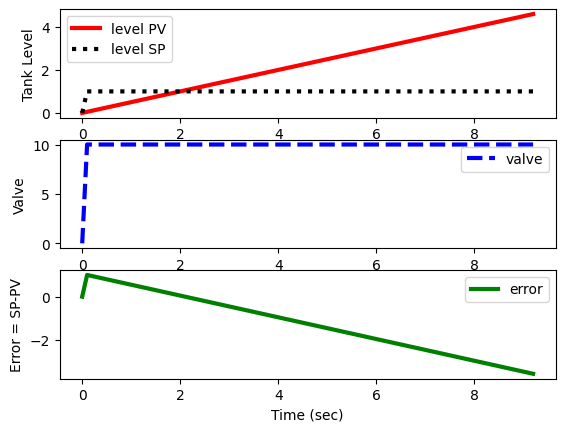

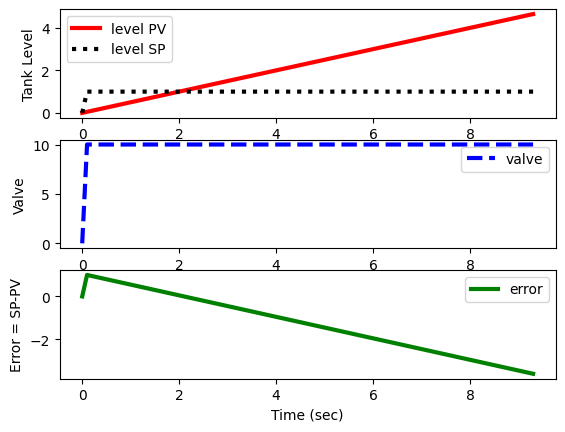

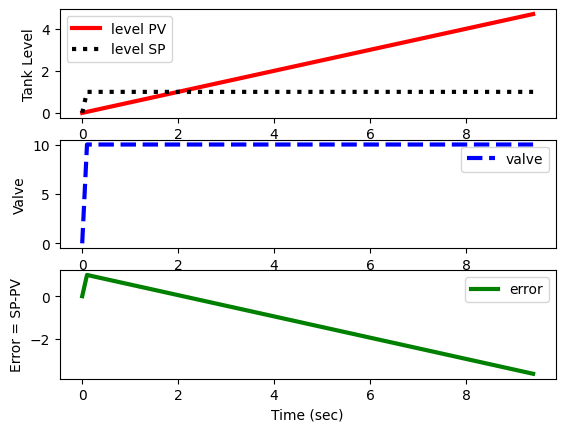

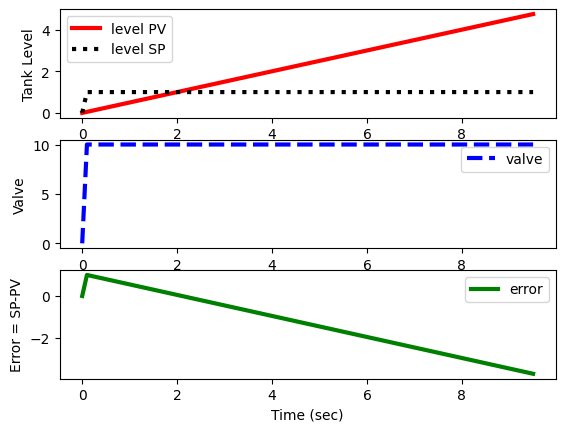

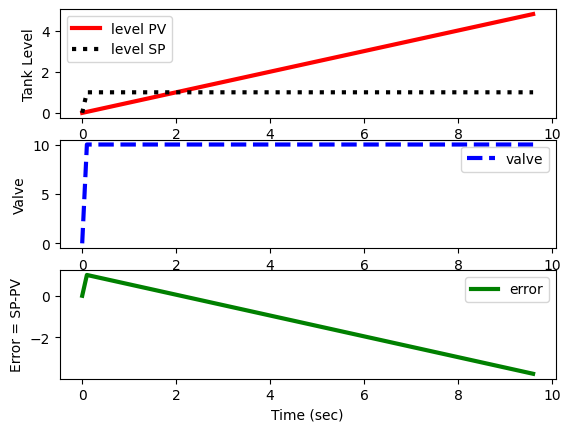

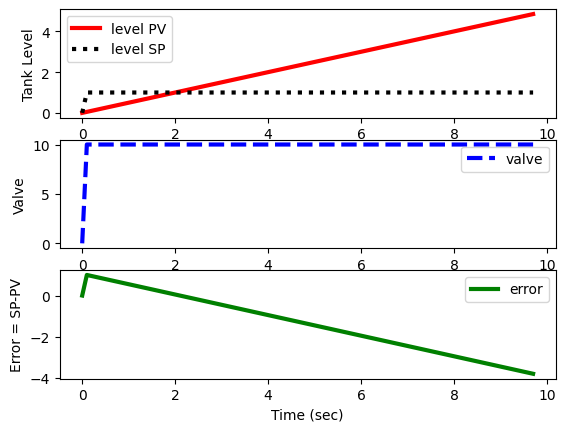

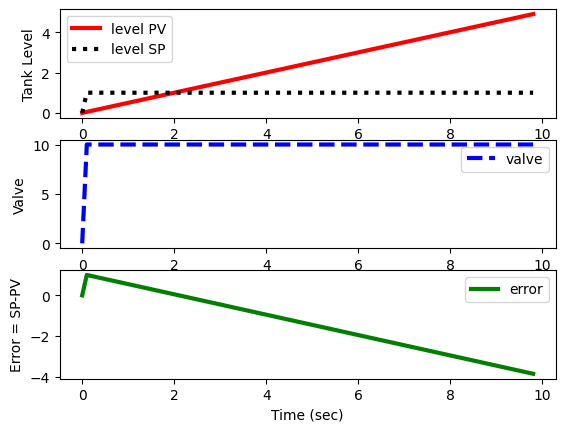

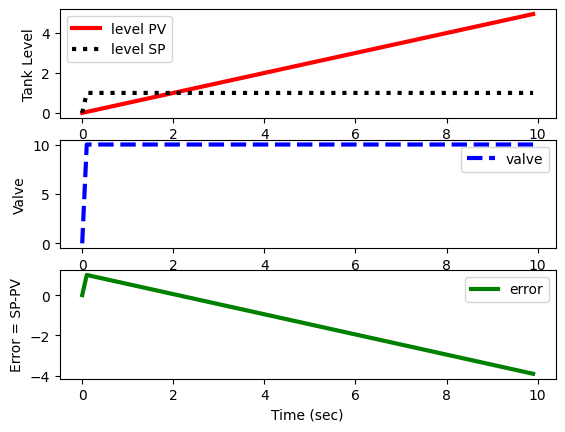

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# animate plots?
animate=True # True / False

# define tank model
def tank(Level,time,c,valve):
    rho = 1000.0 # water density (kg/m^3)
    A = 1.0      # tank area (m^2)
    # calculate derivative of the Level
    dLevel_dt = (c/(rho*A)) * valve
    return dLevel_dt

# time span for the simulation for 10 sec, every 0.1 sec
ts = np.linspace(0,10,101)

# valve operation
c = 50.0          # valve coefficient (kg/s / %open)
u = np.zeros(101) # u = valve % open

# level initial condition
Level0 = 0

# initial valve position
valve = 10

# for storing the results
z = np.zeros(101)
es = np.zeros(101)
sps = np.zeros(101)

# TO DO: what is the value for ubias?
# ubias = ?

# TO DO: decide on a tuning value for Kc
# Kc = ?

# TO DO: record the desired level (set point)
SP = 1

plt.figure(1,figsize=(12,5))
if animate:
    plt.ion()
    plt.show()

# simulate with ODEINT
for i in range(100):
    # calculate the error
    error = SP - Level0

    # TO DO: put P-only controller here
    # valve = 1

    u[i+1] = valve   # store the valve position
    es[i+1] = error  # store the error
    y = odeint(tank,Level0,[0,0.1],args=(c,valve))
    Level0 = y[-1] # take the last point
    z[i+1] = Level0 # store the level for plotting
    sps[i+1] = SP

    if animate:
        # update plot
        plt.clf()
        plt.subplot(3,1,1)
        plt.plot(ts[0:i+1],z[0:i+1],'r-',linewidth=3,label='level PV')
        plt.plot(ts[0:i+1],sps[0:i+1],'k:',linewidth=3,label='level SP')
        plt.ylabel('Tank Level')
        plt.legend(loc='best')
        plt.subplot(3,1,2)
        plt.plot(ts[0:i+1],u[0:i+1],'b--',linewidth=3,label='valve')
        plt.ylabel('Valve')
        plt.legend(loc='best')
        plt.subplot(3,1,3)
        plt.plot(ts[0:i+1],es[0:i+1],'g-',linewidth=3,label='error')
        plt.ylabel('Error = SP-PV')
        plt.xlabel('Time (sec)')
        plt.legend(loc='best')
        plt.pause(0.1)

if not animate:
    # plot results
    plt.subplot(3,1,1)
    plt.plot(ts,z,'r-',linewidth=3,label='level PV')
    plt.plot(ts,sps,'k:',linewidth=3,label='level SP')
    plt.ylabel('Tank Level')
    plt.legend(loc='best')
    plt.subplot(3,1,2)
    plt.plot(ts,u,'b--',linewidth=3,label='valve')
    plt.ylabel('Valve')
    plt.legend(loc='best')
    plt.subplot(3,1,3)
    plt.plot(ts,es,'g-',linewidth=3,label='error')
    plt.ylabel('Error = SP-PV')
    plt.xlabel('Time (sec)')
    plt.legend(loc='best')
    plt.show()